# Handling trajectory data files (reading & writing)

<img align="right" src="https://anitagraser.github.io/movingpandas/assets/img/movingpandas.png">

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/anitagraser/movingpandas/master?filepath=tutorials/2-reading-data-from-files.ipynb)

**<p style="color:#e31883">This notebook demonstrates the current development version of MovingPandas.</p>**

For tutorials using the latest release visit https://github.com/anitagraser/movingpandas-examples.


### You can either loging with **hf_login.sh** or login with down below code
make sure you have a token created in huggingface, also you should set the token with **write** access

In [1]:
from huggingface_hub import login, whoami
login()

### use the hf_tools python package for download or upload csv files

In [2]:
import numpy as np
import os
import hf_tools.scripts.add_path
from hf_tools.src.hf_tools.hf_sync import *

In [4]:
download_file(file_path='hf_tools/data/', 
                  repo_id="ARG-NCTU/uav-usv-traj", 
                  repo_type="dataset", 
                  hf_path='cmd1_vel_relation.csv')
download_file(file_path='hf_tools/data/', 
                  repo_id="ARG-NCTU/uav-usv-traj", 
                  repo_type="dataset", 
                  hf_path='cmd05_vel_relation.csv')
download_file(file_path='hf_tools/data/', 
                  repo_id="ARG-NCTU/uav-usv-traj", 
                  repo_type="dataset", 
                  hf_path='cmd025_vel_relation.csv')

cmd05_vel_relation.csv:   0%|          | 0.00/8.41k [00:00<?, ?B/s]

cmd025_vel_relation.csv:   0%|          | 0.00/8.78k [00:00<?, ?B/s]

## Reading CSVs

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
data1 = pd.read_csv('hf_tools/data/cmd1_vel_relation.csv')
data05 = pd.read_csv('hf_tools/data/cmd05_vel_relation.csv')
data025 = pd.read_csv('hf_tools/data/cmd025_vel_relation.csv')

## Plot cmd and velocity relation

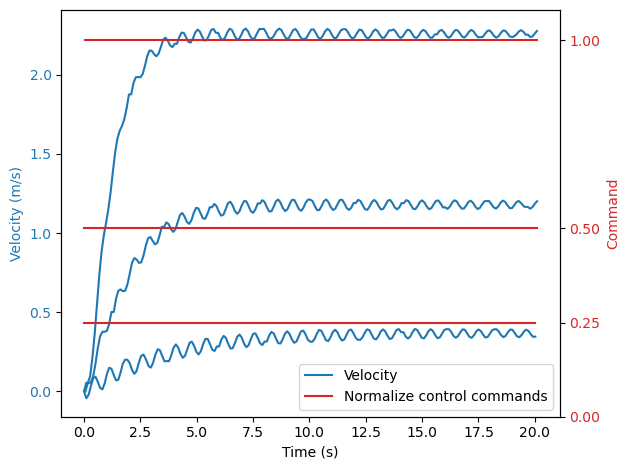

In [12]:
fig, ax1 = plt.subplots()
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Velocity (m/s)', color='tab:blue')
line1, = ax1.plot(data1['t'], data1['vel_linear_x'], color='tab:blue', label='Velocity')
line3, = ax1.plot(data05['t'], data05['vel_linear_x'], color='tab:blue', label='Velocity')
line5, = ax1.plot(data025['t'], data025['vel_linear_x'], color='tab:blue', label='Velocity')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()  
ax2.set_ylabel('Command', color='tab:red')  
line2, = ax2.plot(data1['t'], data1['cmd_linear_x'], color='tab:red', label='Normalize control commands')
line4, = ax2.plot(data05['t'], data05['cmd_linear_x'], color='tab:red', label='Normalize control commands')
line6, = ax2.plot(data025['t'], data025['cmd_linear_x'], color='tab:red', label='Normalize control commands')

ax2.tick_params(axis='y', labelcolor='tab:red')

ax2.set_ylim([0, max(data1['cmd_linear_x']) * 1.08])
ax2.set_yticks(list([0, 0.25, 0.5, 1.0]))
lines = [line1, line2]
ax1.legend(lines, [line.get_label() for line in lines], loc='lower right')
fig.tight_layout()  
plt.show()